## CodeAlpha_ Car Price Prediction with Machine Learning

In [1]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
csv_data = pd.read_csv('/content/car data.csv')

--- Car Price Prediction Model Evaluation ---
R-squared (R²) Score: 0.96
Mean Absolute Error (MAE): 0.62 (in lakhs)
Mean Squared Error (MSE): 0.81

Model Interpretation: The model explains 96% of the variance in selling price.
On average, the model's prediction is off by ₹61,568.


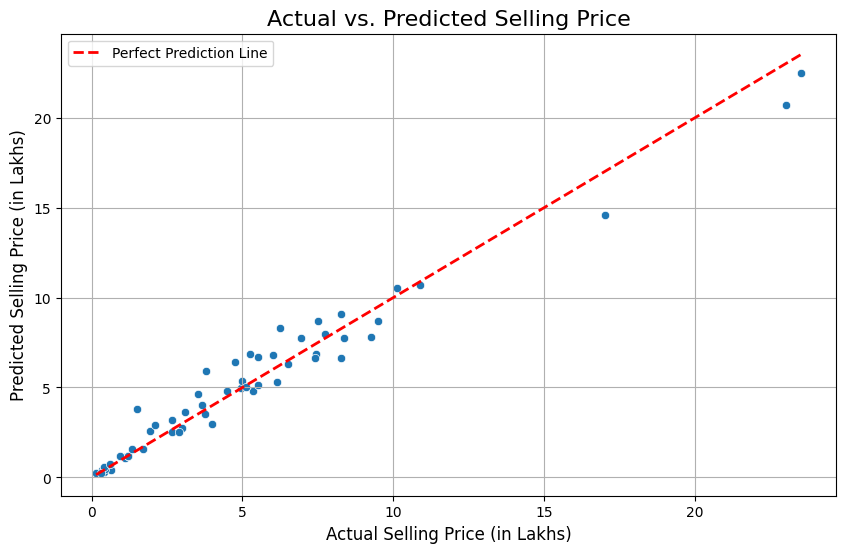

/tmp/ipython-input-3-763566937.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df.head(10), palette='viridis')


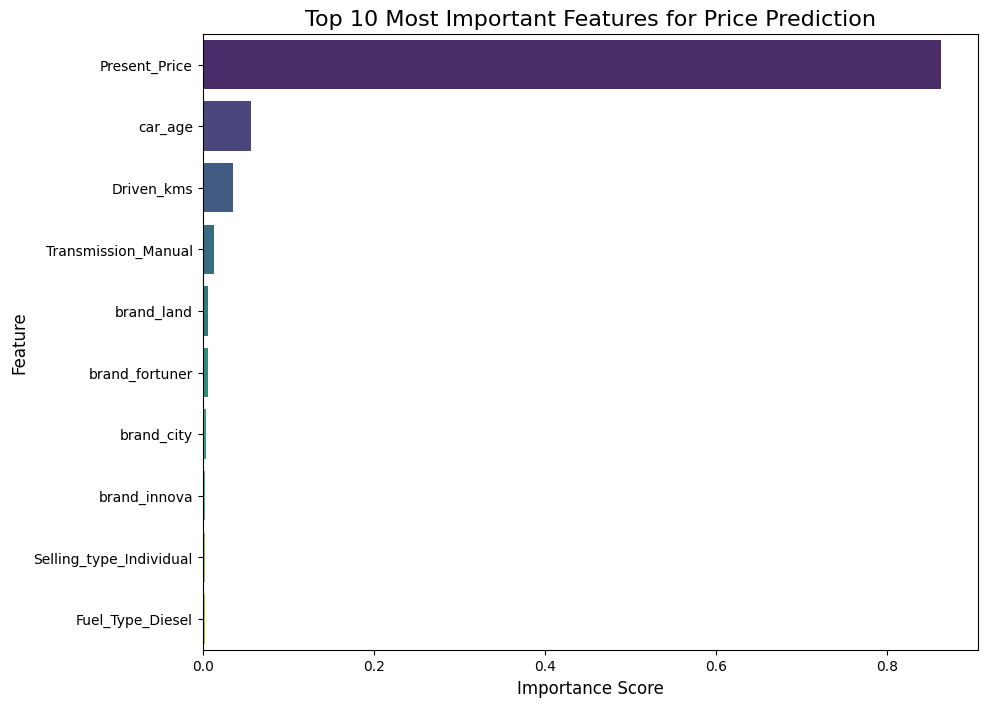


--- Feature Importance Summary ---
                feature  importance
0         Present_Price    0.862593
3               car_age    0.056325
1            Driven_kms    0.035485
7   Transmission_Manual    0.012890
41           brand_land    0.006789


In [3]:
df = csv_data

# Feature Engineering: Create 'car_age' from 'Year'
current_year = 2024
df['car_age'] = current_year - df['Year']

# Feature Engineering: Extract 'brand' from 'Car_Name'
# Note: Some names are motorcycles, the logic holds for brand extraction.
df['brand'] = df['Car_Name'].apply(lambda x: x.split(' ')[0])

# Drop original 'Year' and 'Car_Name' columns
df = df.drop(columns=['Year', 'Car_Name'])

# Step 4: Data Preprocessing (Handle Categorical Variables)
# Convert categorical features into numerical using one-hot encoding
df_processed = pd.get_dummies(df, columns=['Fuel_Type', 'Selling_type', 'Transmission', 'brand'], drop_first=True)

# Step 5: Define Features (X) and Target (y)
X = df_processed.drop(columns=['Selling_Price'])
y = df_processed['Selling_Price']

# Step 6: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train the Regression Model
# Using RandomForestRegressor as it's powerful and versatile
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# Step 8: Make Predictions and Evaluate the Model
y_pred = model.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("--- Car Price Prediction Model Evaluation ---")
print(f"R-squared (R²) Score: {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f} (in lakhs)")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"\nModel Interpretation: The model explains {r2:.0%} of the variance in selling price.")
print(f"On average, the model's prediction is off by ₹{mae*100000:,.0f}.")


# Step 9: Visualize Model Performance
# Scatter plot of Actual vs. Predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
# Add a line for perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2, label='Perfect Prediction Line')
plt.title('Actual vs. Predicted Selling Price', fontsize=16)
plt.xlabel('Actual Selling Price (in Lakhs)', fontsize=12)
plt.ylabel('Predicted Selling Price (in Lakhs)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Step 10: Analyze Feature Importance
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values(by='importance', ascending=False)

# Plot the top 10 most important features
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('Top 10 Most Important Features for Price Prediction', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()

print("\n--- Feature Importance Summary ---")
print(feature_importance_df.head())